In [1]:
import yfinance as yf
import pandas as pd

# Download Bitcoin historical price from 2020 to now
btc = yf.download('BTC-USD', start='2020-01-01', end='2025-07-25')

# Save only date and closing price
btc = btc.reset_index()[['Date', 'Close']]
btc.columns = ['date', 'price']

btc.to_csv('data/bitcoin_price.csv', index=False)
print("Bitcoin price data saved.")


ModuleNotFoundError: No module named 'yfinance'

In [2]:
pip install yfinance


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 31.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=129c283e8df54dc96c263d848aba3802de43f3aa185e599746c09c92a069790e
  Stored in directory: /Users/eltayebyousif/Library/Caches/pip/wheels/42/d6/84/bf57a755f4569494cd00de4bb46ef064874823f4d19c82e960
  Created wheel for peewee: filename=peewee-3.18.2-cp311-cp311-macosx_15_0_arm64.whl size=285618 sha256=c8166dec917cca9e14b4c463caf5392ef867a000b9ee4aea89849b1d33afca9d
  Stored in directory: /Users/eltayebyousif/Library/Caches/pip/wheels/28/84/61/758d1bd7b9c9d700158c8642a8aff2a

In [1]:
import yfinance as yf
import pandas as pd

# Download Bitcoin historical price from 2020 to now
btc = yf.download('BTC-USD', start='2020-01-01', end='2025-07-25')

# Save only date and closing price
btc = btc.reset_index()[['Date', 'Close']]
btc.columns = ['date', 'price']

btc.to_csv('data/bitcoin_price.csv', index=False)
print("Bitcoin price data saved.")


/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_48358/1850570840.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2020-01-01', end='2025-07-25')
[*********************100%***********************]  1 of 1 completed


OSError: Cannot save file into a non-existent directory: 'data'

In [2]:
import os

os.makedirs('data', exist_ok=True)


In [3]:
btc.to_csv('data/bitcoin_price.csv', index=False)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned bitcoin price data
df = pd.read_csv('data/bitcoin_price.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


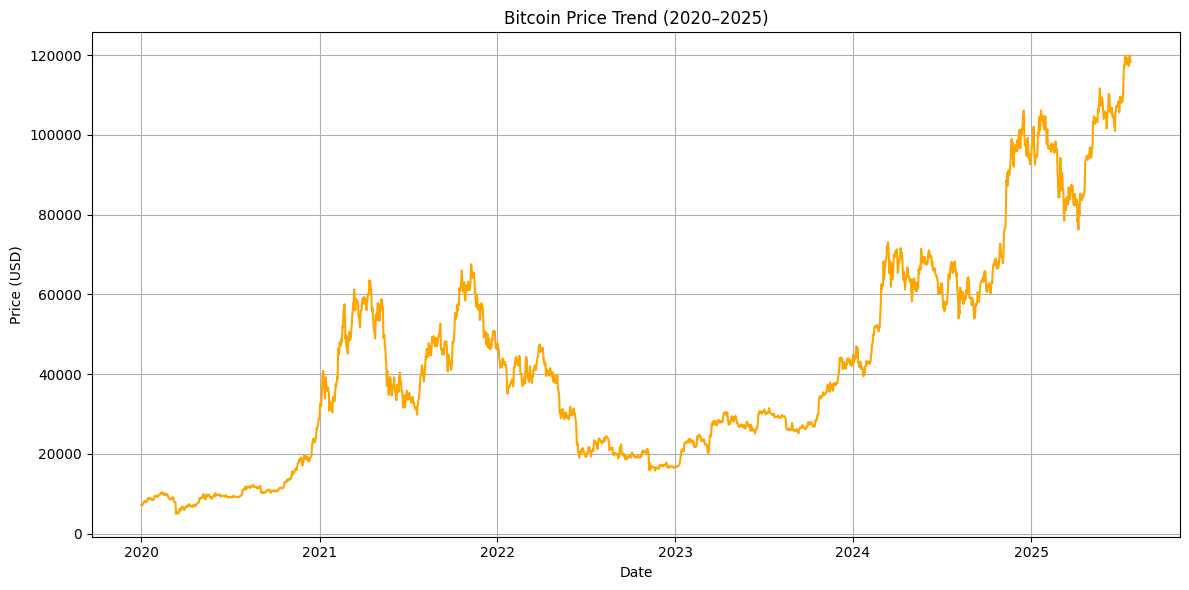

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], color='orange')
plt.title('Bitcoin Price Trend (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Calculate 50-day and 200-day SMAs
df['SMA50'] = df['price'].rolling(window=50).mean()
df['SMA200'] = df['price'].rolling(window=200).mean()


In [7]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['price'])


In [8]:
df['rolling_mean'] = df['price'].rolling(window=20).mean()
df['rolling_std'] = df['price'].rolling(window=20).std()
df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * 2)
df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * 2)


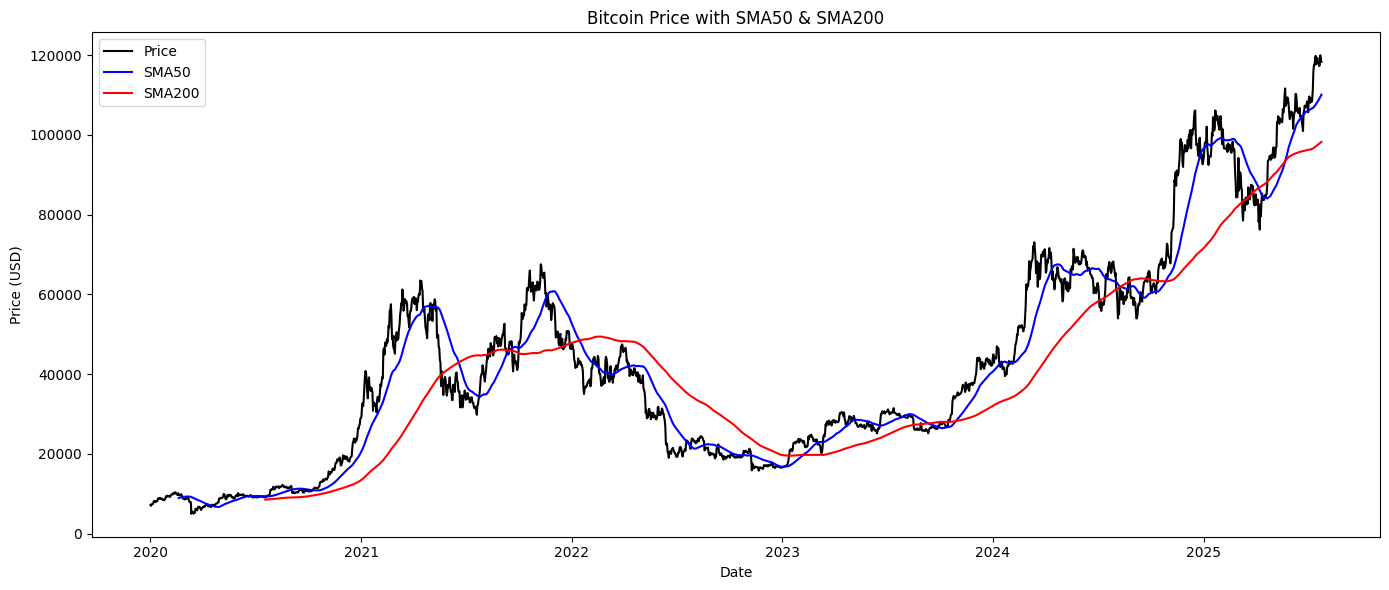

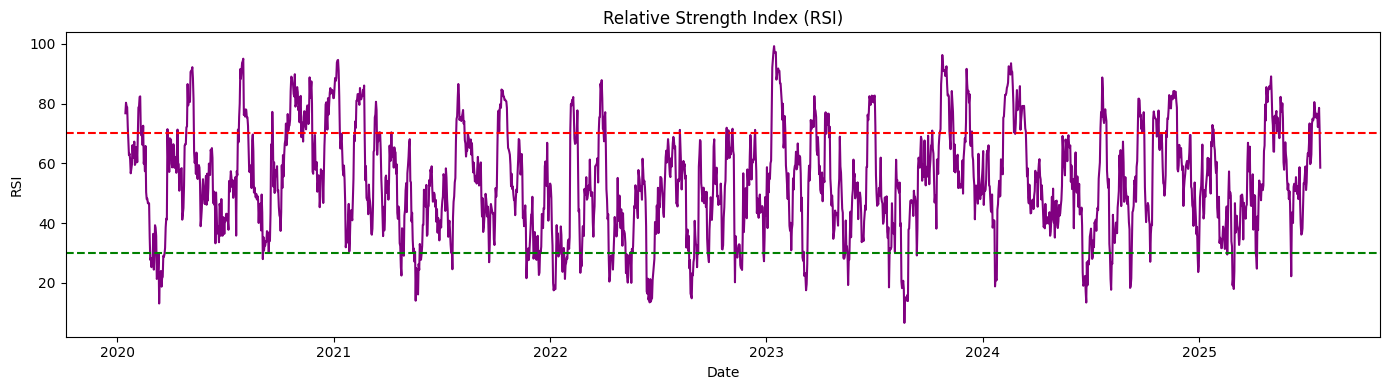

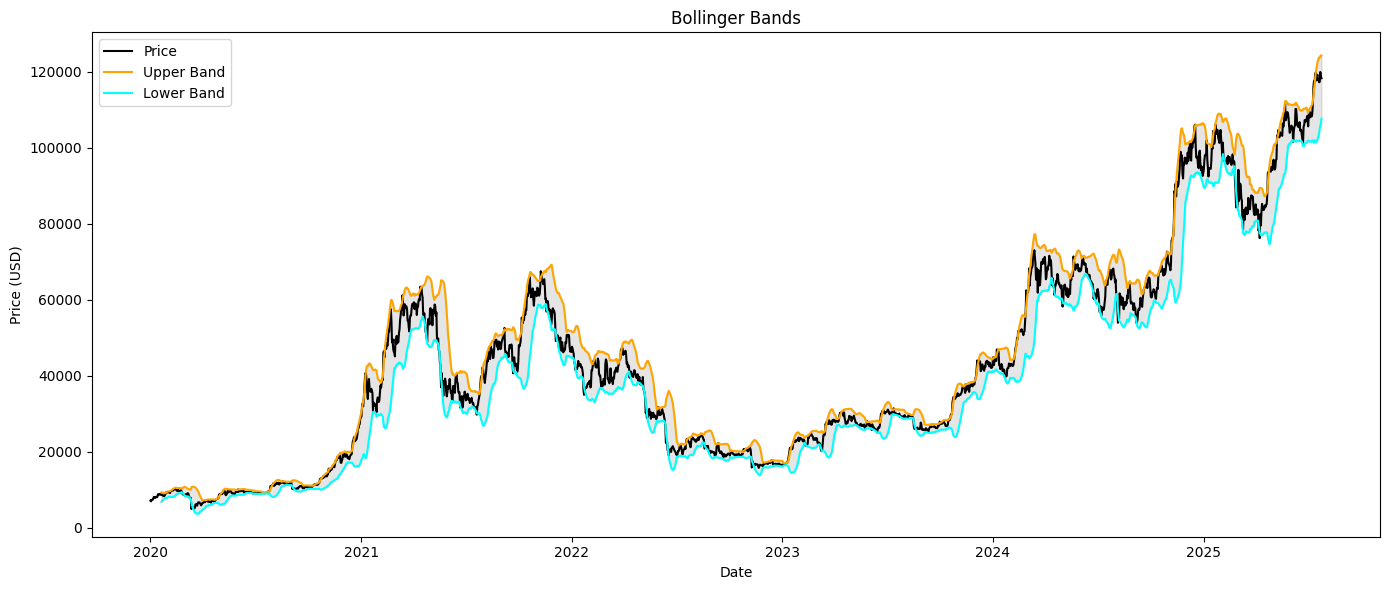

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv('data/bitcoin_price.csv')  # adjust path if needed
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# SMAs
df['SMA50'] = df['price'].rolling(window=50).mean()
df['SMA200'] = df['price'].rolling(window=200).mean()

# RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['price'])

# Bollinger Bands
df['rolling_mean'] = df['price'].rolling(window=20).mean()
df['rolling_std'] = df['price'].rolling(window=20).std()
df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * 2)
df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * 2)

# Plot 1: Price + SMAs
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['price'], label='Price', color='black')
plt.plot(df['date'], df['SMA50'], label='SMA50', color='blue')
plt.plot(df['date'], df['SMA200'], label='SMA200', color='red')
plt.title('Bitcoin Price with SMA50 & SMA200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Plot 2: RSI
plt.figure(figsize=(14, 4))
plt.plot(df['date'], df['RSI'], color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Plot 3: Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['price'], label='Price', color='black')
plt.plot(df['date'], df['upper_band'], label='Upper Band', color='orange')
plt.plot(df['date'], df['lower_band'], label='Lower Band', color='cyan')
plt.fill_between(df['date'], df['lower_band'], df['upper_band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


In [10]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

def scrape_tweets(query, since, until, max_tweets=500):
    tweets = []
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'{query} since:{since} until:{until} lang:en').get_items()):
        if i >= max_tweets:
            break
        tweets.append([tweet.date, tweet.content])
    return pd.DataFrame(tweets, columns=['date', 'content'])

# Example for 2024 only
df_2024 = scrape_tweets('bitcoin', '2024-01-01', '2025-01-01')
df_2024.to_csv('data/bitcoin_tweets_2024.csv', index=False)
print("Saved tweets for 2024")


Error retrieving https://twitter.com/search?f=live&lang=en&q=bitcoin+since%3A2024-01-01+until%3A2025-01-01+lang%3Aen&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=bitcoin+since%3A2024-01-01+until%3A2025-01-01+lang%3Aen&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))"))
4 requests to https://twitter.com/search?f=live&lang=en&q=bitcoin+since%3A2024-01-01+until%3A2025-01-01+lang%3Aen&src=spelling_expansion_revert_click failed, giving up.
Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=bitcoin+since%3A2024-01-01+until%3A2025-01-01+lang%3Aen&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL:

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=bitcoin+since%3A2024-01-01+until%3A2025-01-01+lang%3Aen&src=spelling_expansion_revert_click failed, giving up.

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Example tweet
tweet = "Bitcoin is crashing again lol"


ModuleNotFoundError: No module named 'transformers'

In [15]:
pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [transformers] [transformers]
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install transformers


zsh:1: command not found: pip


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Sample tweet
tweet = "Bitcoin is crashing again lol"

# Preprocess
encoded_input = tokenizer(tweet, return_tensors='pt')
output = model(**encoded_input)

# Apply softmax to get probabilities
scores = softmax(output.logits.detach().numpy()[0])

# Map scores to labels
labels = ['negative', 'neutral', 'positive']
for label, score in zip(labels, scores):
    print(f"{label}: {score:.4f}")


/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


ModuleNotFoundError: No module named 'scipy'

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Sample tweet
tweet = "Bitcoin is crashing again lol"

# Preprocess
encoded_input = tokenizer(tweet, return_tensors='pt')
output = model(**encoded_input)
scores = output.logits.detach().numpy()[0]
scores = softmax(scores)

# Print results
labels = ['Negative', 'Neutral', 'Positive']
for label, score in zip(labels, scores):
    print(f"{label}: {score:.4f}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Negative: 0.7562
Neutral: 0.2108
Positive: 0.0330


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
import torch
from tqdm import tqdm

# Load model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict sentiment score
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
        scores = softmax(logits.numpy()[0])
    return {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }

# Load tweets CSV
df = pd.read_csv("data/bitcoin_tweets_2024.csv")  # Change path to your actual tweet file

# Drop empty or NaN content
df = df.dropna(subset=['content'])

# Apply sentiment analysis to each tweet
results = []
for text in tqdm(df['content'], desc="Analyzing Sentiment"):
    scores = get_sentiment(text)
    results.append(scores)

# Add scores to DataFrame
df_sentiment = pd.DataFrame(results)
df = pd.concat([df, df_sentiment], axis=1)

# Save result
df.to_csv("data/bitcoin_tweets_2024_sentiment.csv", index=False)
print("Saved sentiment-enriched tweet data.")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


FileNotFoundError: [Errno 2] No such file or directory: 'data/bitcoin_tweets_2024.csv'

In [3]:
sample_tweets = [
    "Bitcoin is going to the moon 🚀",
    "Not sure about BTC anymore...",
    "Bitcoin just crashed 10% in one day. Awful!",
    "I'm buying the dip!",
    "This market is crazy lol"
]

# Run sentiment analysis on sample tweets
sample_results = []
for text in sample_tweets:
    scores = get_sentiment(text)
    print(f"\n{text}")
    print(f"Negative: {scores['negative']:.2f}, Neutral: {scores['neutral']:.2f}, Positive: {scores['positive']:.2f}")
    sample_results.append(scores)



Bitcoin is going to the moon 🚀
Negative: 0.00, Neutral: 0.06, Positive: 0.94

Not sure about BTC anymore...
Negative: 0.37, Neutral: 0.61, Positive: 0.02

Bitcoin just crashed 10% in one day. Awful!
Negative: 0.94, Neutral: 0.05, Positive: 0.01

I'm buying the dip!
Negative: 0.01, Neutral: 0.21, Positive: 0.78

This market is crazy lol
Negative: 0.40, Neutral: 0.33, Positive: 0.26


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample mocked sentiment data
sentiment_data = {
    'date': pd.date_range(start='2024-01-01', periods=5, freq='D'),
    'positive': [0.94, 0.02, 0.01, 0.78, 0.26],
    'neutral':  [0.06, 0.61, 0.05, 0.21, 0.33],
    'negative': [0.00, 0.37, 0.94, 0.01, 0.40]
}
sentiment_df = pd.DataFrame(sentiment_data)
sentiment_df['net_sentiment'] = sentiment_df['positive'] - sentiment_df['negative']


In [5]:
price_df = pd.read_csv('data/bitcoin_price.csv')
price_df['date'] = pd.to_datetime(price_df['date'])


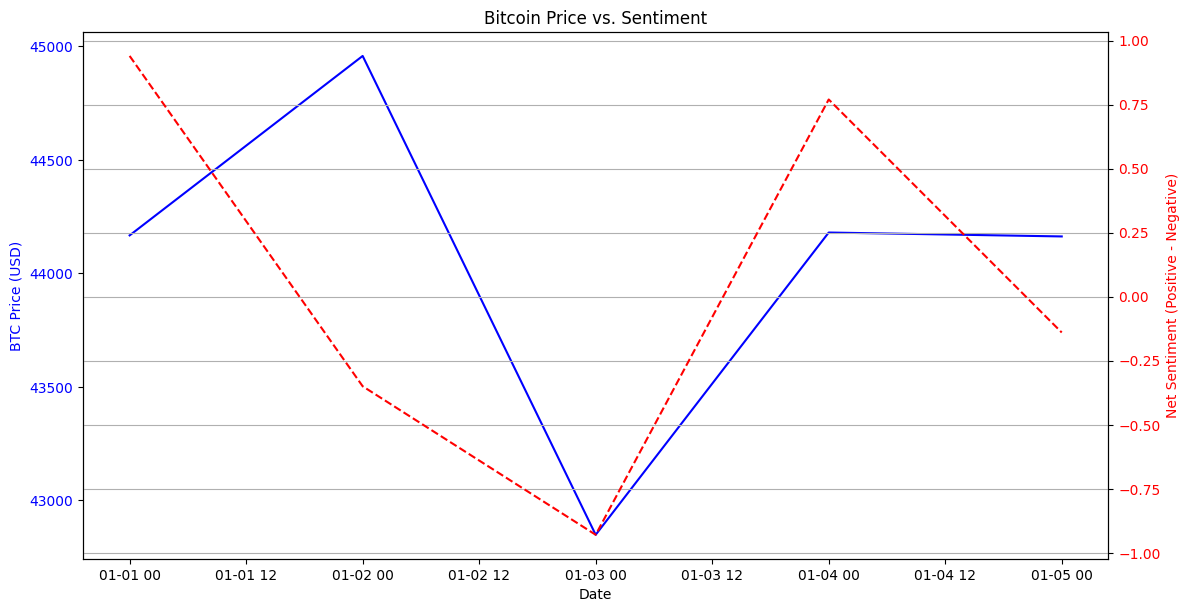

In [6]:
# Merge on date
merged = pd.merge(price_df, sentiment_df, on='date', how='inner')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color='blue')
ax1.plot(merged['date'], merged['price'], color='blue', label='BTC Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Net Sentiment (Positive - Negative)', color='red')
ax2.plot(merged['date'], merged['net_sentiment'], color='red', linestyle='--', label='Net Sentiment')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Bitcoin Price vs. Sentiment')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

df = pd.read_csv('/mnt/data/bitcoin_price.csv')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/bitcoin_price.csv'

In [8]:
df = pd.read_csv('/mnt/data/bitcoin_price.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/bitcoin_price.csv'

In [9]:
df = pd.read_csv('data/bitcoin_price.csv')


In [10]:
sentiment_df.to_csv('data/bitcoin_tweet_sentiments.csv', index=False)


In [11]:
sentiment_df.to_csv('/mnt/data/bitcoin_tweet_sentiments.csv', index=False)


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [13]:
import pandas as pd

sentiment_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/bitcoin-analysis/data')
print(sentiment_df.head())


IsADirectoryError: [Errno 21] Is a directory: '/Users/eltayebyousif/Documents/meme-coin project/bitcoin-analysis/data'

In [14]:
import pandas as pd

sentiment_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/bitcoin-analysis/data/bitcoin_tweet_sentiments.csv')
print(sentiment_df.head())


         date  positive  neutral  negative  net_sentiment
0  2024-01-01      0.94     0.06      0.00           0.94
1  2024-01-02      0.02     0.61      0.37          -0.35
2  2024-01-03      0.01     0.05      0.94          -0.93
3  2024-01-04      0.78     0.21      0.01           0.77
4  2024-01-05      0.26     0.33      0.40          -0.14
